# Cylinder plots

In [18]:
# Imports
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline
import matplotlib.patches as mpatches
from IPython.display import Image

Latex Macros
$\newcommand{\AA}{\unicode{xC5}}$

## Free vs. Fixed Substrate

The following are comparisons of results for horizontal cylindrical water droplets adsorbing to sapphire surfaces.
The cylindrical droplet simulations are run with a sapphire substrate which is thin both in the direction of the axis of the cylinder as well as vertically thin.
It is long in the horizontal direction perpendicular to the cylinder's axis.
Initially, the simulations were run with the substrate free to move, but significant oscillations in the substrate occured which generated a great deal of noise in the results.
The simulations were then rerun with the sapphire substrate fixed in place.
The following is a comparison of the results.

All simulations in this section are from Sub951By50.

In [19]:
old_dir = "$SCRATCH/droplet/results/Bob/Sub951By50/finalResults/avg/"
new_dir = "$SCRATCH/droplet/results/Bob/Sub951By50/finalResults/New/avg/"
old_mrad = genfromtxt(old_dir+"monoEdge.txt")
new_mrad = genfromtxt(new_dir+"monoEdge.txt")
old_brad = genfromtxt(old_dir+"bulkEdge.txt")
new_brad = genfromtxt(new_dir+"bulkEdge.txt")

### Free substrate

The following is the monolayer radius over time from the initial simulation with free substrate.
Notice that the present labels are incorrect. The purple line labeled $20\AA$ is actually $100\AA$.
All other lines actually represent the droplet $10\AA$ smaller than their label suggests.

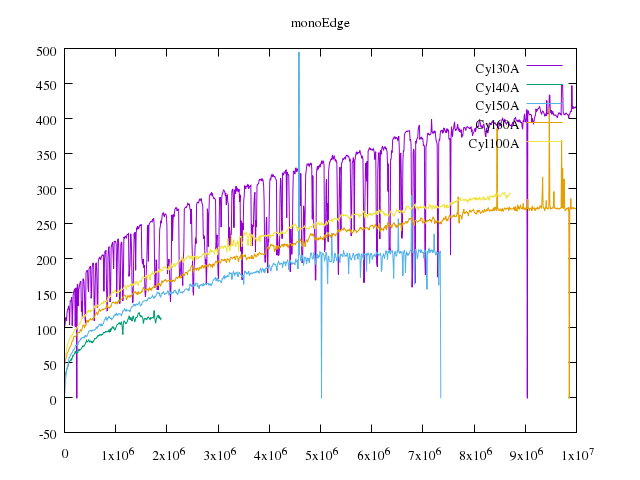

In [20]:
Image(old_dir+"monoEdge.png")

### Fixed substrate

Here are the new $60\AA$ and $100\AA$ droplets, run with a fixed sapphire substrate.
Note that the troublesome oscillations are entirely eliminated.

(0, 500)

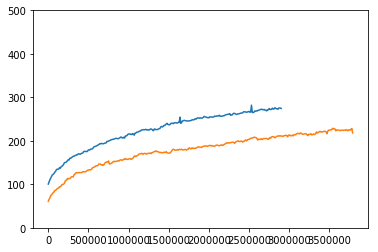

In [21]:
# Plot new values
for i in range(1,new_mrad.shape[1]):
    plot(new_mrad[:,0],new_mrad[:,i])

ylim(0,500)

### Comparative Plot
We observe that by freezing the substrate, nearly all of the oscillatory noise is eliminated.
Our explanation is as follows.
As the substrate oscillates, it does so primarily with the fundamental wavelength of the substrate.
That is, a standing wave forms with wavelength twice the width of the substrate (width measured perpendicular to cylindrical axis).
In calculating the monolayer radius, we inspect the density of water along a lamina with vertical normal, whose position is fixed relative to the center of mass of the substrate.
When the substrate is flat, this lamina is maximally filled.
When standing wave oscillations occur, however, some of this lamina is filled not by water, but by substrate or empty space.
This lowers the observed density of water, thereby reducing the calculated monolayer radius.
This explanation is well-supported by the results below.

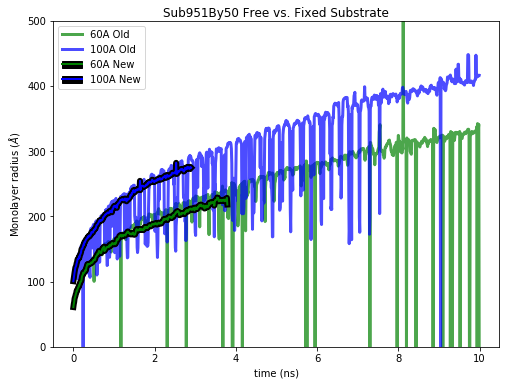

In [22]:
# Create figure
figure(figsize=[8,6])

# 60A = green
# 100A = blue
# Old = dashed
# New = solid
color_list = ['g','b']
label_list = ['60A','100A']
num_list = [-1,1]
patch_list = []

# Plot old values
for i in range(2):
    patch_list.append(plot(old_mrad[:,0]/1e6,old_mrad[:,num_list[i]],
        label=label_list[i]+" Old",
        color=color_list[i],
        alpha=0.7,
        lw=3)[0])

    
shadow_patch = mpatches.Patch(color='k',lw=1,ls='-')
    
# Plot new values
for i in range(2):
    #patch_list.append([shadow_patch])
    # Shadow
    plot(new_mrad[:,0]/1e6,new_mrad[:,num_list[i]],
        #label=label_list[i],
        color='k',
        ls='-',
        lw=6)
    # Color
    pl, = plot(new_mrad[:,0]/1e6,new_mrad[:,num_list[i]],
        label=label_list[i]+" New",
        color=color_list[i],
        ls='-',
        lw=2)
    
    patch_list.append(((shadow_patch,pl),))

# Set plot limits
ylim(0,500)
legend(patch_list,['60A Old','100A Old','60A New','100A New'],loc='best')
title('Sub951By50 Free vs. Fixed Substrate')
xlabel('time (ns)')
ylabel('Monolayer radius ($\AA$)')
savefig('results/oldnewcyl.png')

## Comparing substrate lengths: $50\AA$ vs. $100\AA$

We have run the Cyl$100\AA$ case for two different simulation box lengths in the direction of the cylindrical axis: $50\AA$ and $100\AA$.
Several other cylinders have also been run for the $50\AA$ length.
We seek to compare the two simulations.
If there are no differences between the results, then we would obviously prefer to use the data we already have.
If necessary, though, we could perform more experiments with the longer box length.
Based on the results below, it appears that this will not be necessary.

### Sub951By50 results:

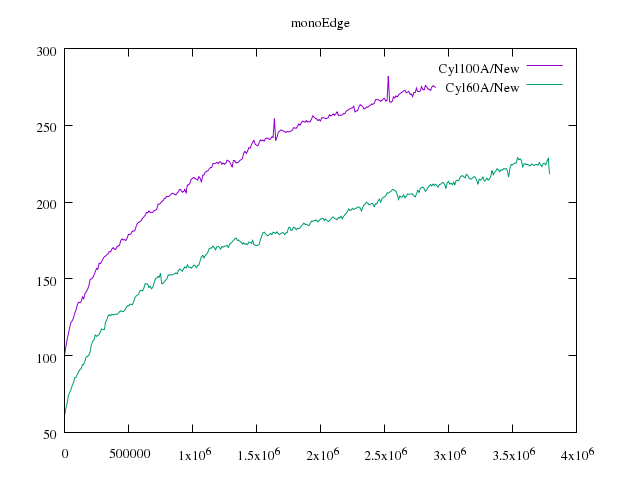

In [23]:
Image('../results/Bob/Sub951By50/finalResults/New/avg/monoEdge.png')

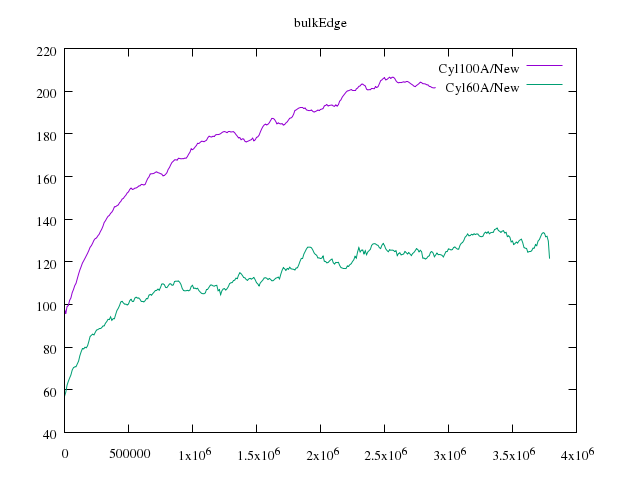

In [24]:
Image('../results/Bob/Sub951By50/finalResults/New/avg/bulkEdge.png')

### Sub951By100 results:

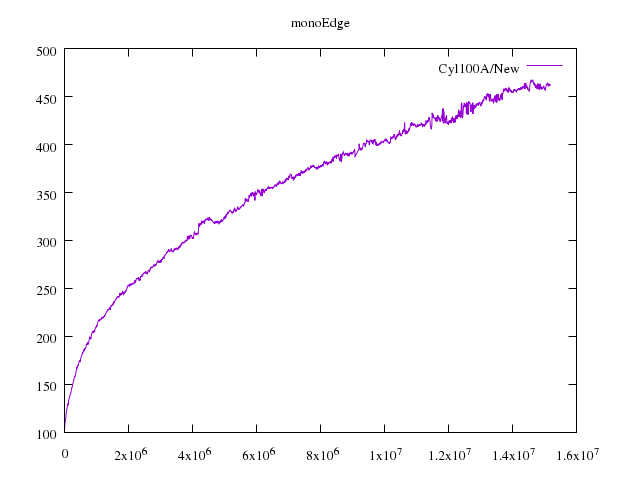

In [25]:
Image('../results/Bob/Sub951By100/finalResults/New/avg/monoEdge.png')

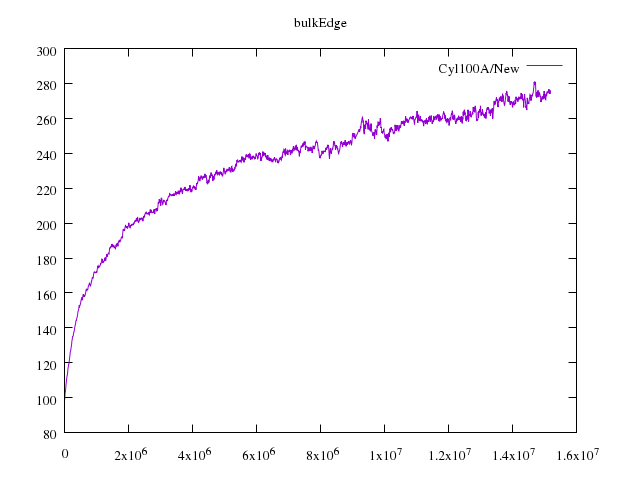

In [26]:
Image('../results/Bob/Sub951By100/finalResults/New/avg/bulkEdge.png')

### Comparing Sub951By50 and Sub951By100

In [27]:
# Load data
sub50_dir = "$SCRATCH/droplet/results/Bob/Sub951By50/finalResults/New/avg/"
sub100_dir = "$SCRATCH/droplet/results/Bob/Sub951By100/finalResults/New/avg/"

# Monolayer radius
sub50_mrad = genfromtxt(sub50_dir+"monoEdge.txt")
sub100_mrad = genfromtxt(sub100_dir+"monoEdge.txt") 

# Bulk radius
sub50_brad = genfromtxt(sub50_dir+"bulkEdge.txt")
sub100_brad = genfromtxt(sub100_dir+"bulkEdge.txt") 

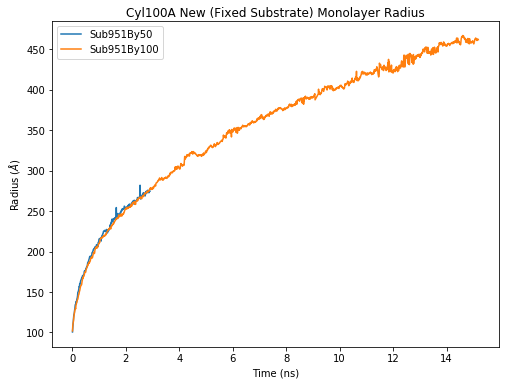

In [28]:
# Plot Cyl100A for both lengths
figure(figsize=[8,6])
plot(sub50_mrad[:,0]/1e6,sub50_mrad[:,1],label='Sub951By50')
plot(sub100_mrad[:,0]/1e6,sub100_mrad[:,1],label='Sub951By100')
legend(loc='best')
title('Cyl100A New (Fixed Substrate) Monolayer Radius')
xlabel('Time (ns)')
ylabel('Radius ($\AA$)')
savefig('results/Cyl100A_sub50vs100_mono.png')

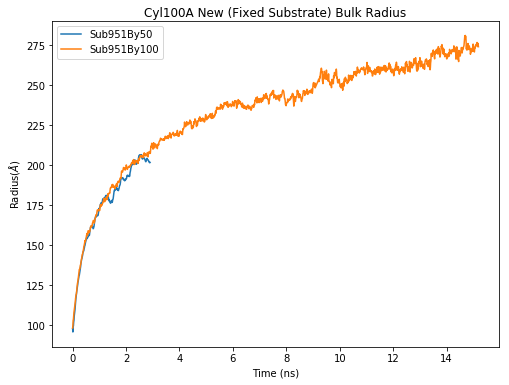

In [29]:
# Plot Cyl100A for both lengths
figure(figsize=[8,6])
plot(sub50_brad[:,0]/1e6,sub50_brad[:,1],label='Sub951By50')
plot(sub100_brad[:,0]/1e6,sub100_brad[:,1],label='Sub951By100')
legend(loc='best')
title('Cyl100A New (Fixed Substrate) Bulk Radius')
xlabel('Time (ns)')
ylabel('Radius($\AA$)')
savefig('results/Cyl100A_sub50vs100_bulk.png')

Based on these plots, it appears that doubling the length of the simulation box has no effect on the spreading dynamics.
This is encouraging, as it suggests that our simulation is not being heavily influenced by edge effects.
It also suggests that we need not rerun any simulations, since the Sub951By50 and Sub951By100 simulations produce nearly identical results.

## Comparison with old plots

After running the Sub951By100_Cyl100A for over 6ns, we're wondering if we have enough data to stop the simulation. For comparison, here are the previous plots for small droplets with the free substrate compared with the new Sub951By50_Cyl60A and Sub951By100_Cyl100A

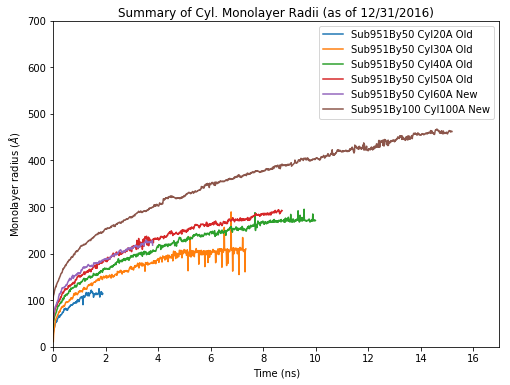

In [38]:
# Create figure
figure(figsize=[8,6])

# Plot old Sub951By50 values
for i in range(2,old_mrad.shape[1]-1):
    whichvals = logical_and(old_mrad[:,i]<300,old_mrad[:,i]>10)
    lbl = 'Sub951By50 Cyl{}0A Old'.format(i)
    plot(old_mrad[:,0][whichvals]/1e6,old_mrad[:,i][whichvals],
        label=lbl)

# Plot new Sub951By50_60A values
plot(sub50_mrad[:,0]/1e6,sub50_mrad[:,2],label='Sub951By50 Cyl60A New')

# Plot new Sub951By100_100A values
plot(sub100_mrad[:,0]/1e6,sub100_mrad[:,1],label='Sub951By100 Cyl100A New')

# Disclaimer
disclaimer = '''\
***************************
* Some extraneous values  *
* have been intentionally *
* removed from Old sims   *
***************************'''
#text(.2,390,disclaimer,ha='left',va='top',
#   family='monospace')

# Plot features
title('Summary of Cyl. Monolayer Radii (as of 12/31/2016)')
xlabel('Time (ns)')
ylabel(r'Monolayer radius ($\AA$)')
ylim(0,700) 
xlim(0,17)
legend(loc='best')
savefig('results/cyl_mono_summary.png')

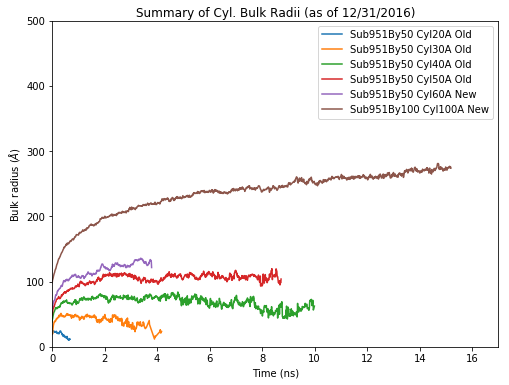

In [40]:
# Create figure
figure(figsize=[8,6])

# Plot old Sub951By50 values
for i in range(2,old_brad.shape[1]-1):
    whichvals = logical_and(old_brad[:,i]<300,old_brad[:,i]>10)
    lbl = 'Sub951By50 Cyl{}0A Old'.format(i)
    plot(old_brad[:,0][whichvals]/1e6,old_brad[:,i][whichvals],
        label=lbl)

# Plot new Sub951By50_60A values
plot(sub50_brad[:,0]/1e6,sub50_brad[:,2],label='Sub951By50 Cyl60A New')

# Plot new Sub951By100_100A values
plot(sub100_brad[:,0]/1e6,sub100_brad[:,1],label='Sub951By100 Cyl100A New')

# Disclaimer
disclaimer = '''\
***************************
* Some extraneous values  *
* have been intentionally *
* removed from Old sims   *
***************************'''
#text(.2,390,disclaimer,ha='left',va='top',
#    family='monospace')

# Plot features
title('Summary of Cyl. Bulk Radii (as of 12/31/2016)')
xlabel('Time (ns)')
ylabel(r'Bulk radius ($\AA$)')
ylim(0,500) 
xlim(0,17)
legend(loc='best')
savefig('results/cyl_bulk_summary.png')

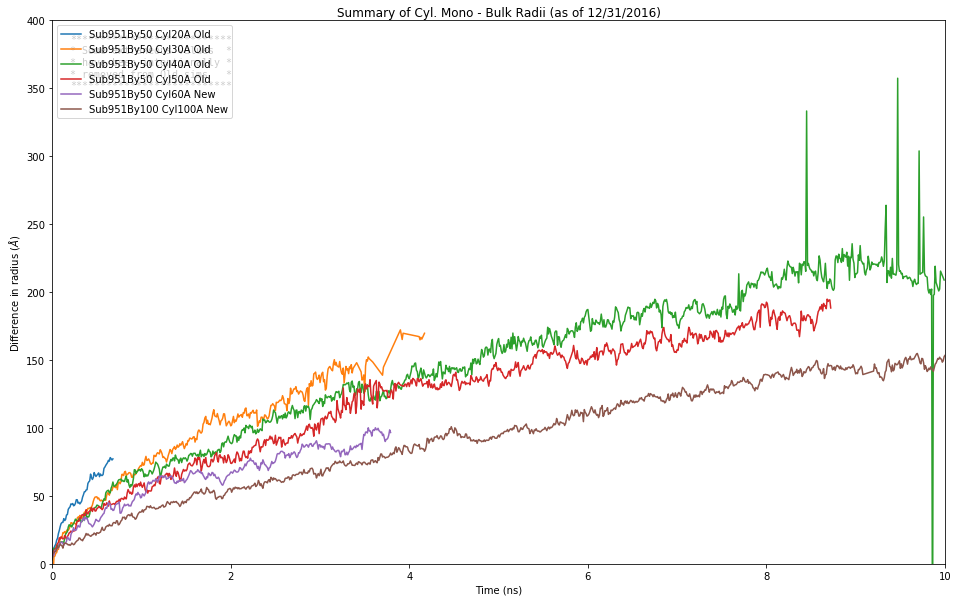

In [32]:
## Monolayer - Bulk Radius difference ##

# Create figure
figure(figsize=[16,10])

# Plot old Sub951By50 values
for i in range(2,old_brad.shape[1]-1):
    whichvals = logical_and(old_brad[:,i]<300,old_brad[:,i]>10)
    lbl = 'Sub951By50 Cyl{}0A Old'.format(i)
    plot(old_brad[:,0][whichvals]/1e6,old_mrad[:,i][whichvals]-old_brad[:,i][whichvals],
        label=lbl)

# Plot new Sub951By50_60A values
plot(sub50_brad[:,0]/1e6,sub50_mrad[:,2]-sub50_brad[:,2],label='Sub951By50 Cyl60A New')

# Plot new Sub951By100_100A values
plot(sub100_brad[:,0]/1e6,sub100_mrad[:,1]-sub100_brad[:,1],label='Sub951By100 Cyl100A New')

# Disclaimer
disclaimer = '''\
***************************
* Some extraneous values  *
* have been intentionally *
* removed from Old sims   *
***************************'''
text(.2,390,disclaimer,ha='left',va='top',
    family='monospace')

# Plot features
title('Summary of Cyl. Mono - Bulk Radii (as of 12/31/2016)')
xlabel('Time (ns)')
ylabel(r'Difference in radius ($\AA$)')
ylim(0,400) 
xlim(0,10)
legend(loc='best')
savefig('results/cyl_bulk_summary.png')

(0, 10)

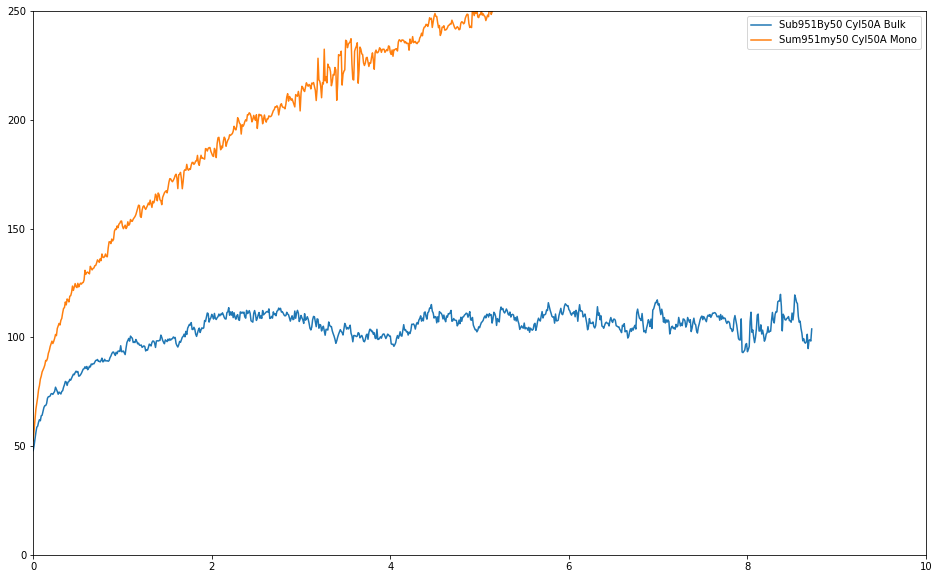

In [33]:
# Plot bulk and monolayer radius together for Sub951By50 Cyl50A

figure(figsize=[16,10])

# Cyl50A
i = 5

# bulk
#b_whichvals = logical_and(old_brad[:,i]<300,old_brad[:,i]>10)
b_lbl = 'Sub951By50 Cyl{}0A Bulk'.format(i)
plot(old_brad[:,0][whichvals]/1e6,old_brad[:,i][whichvals],
    label=b_lbl)

# mono
#m_whichvals = logical_and(old_mrad[:,i]<300,old_mrad[:,i]>10)
m_lml = 'Sum951my50 Cyl{}0A Mono'.format(i)
plot(old_mrad[:,0][whichvals]/1e6,old_mrad[:,i][whichvals],
    label=m_lml)

legend()
ylim(0,250)
xlim(0,10)

### 60A_New anomaly?

I'm noticing that the Sub951By50_Cyl60A_New monolayer radius begins by mimicing Sub951By50_Cyl60A_Old, but then seems to jump down to follow Sub951By50_Cyl50A_New.

I'm excluding certain values to cut out some noise from the free substrate simulations. This is a rough improvement

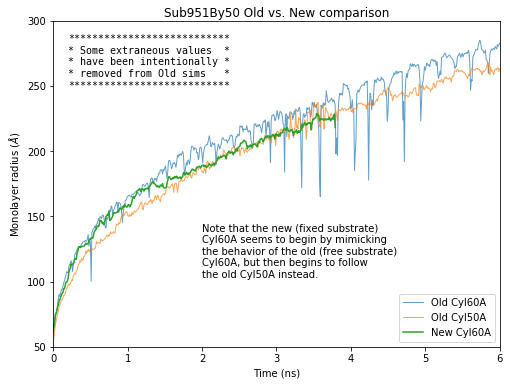

In [34]:
# Create figure
figure(figsize=[8,6])

labels=['Old Cyl60A','Old Cyl50A']

# Plot old Sub951By50 values
for j,i in enumerate(range(6,4,-1)):
    # Which values to use to cut out noise
    whichvals = old_mrad[:,i]>50
    plot(old_mrad[:,0][whichvals]/1e6,old_mrad[:,i][whichvals],
         lw=1,alpha=0.7,label=labels[j])

# Plot new Sub951By50_60A values
plot(sub50_mrad[:,0]/1e6,sub50_mrad[:,2],lw=1.5,label='New Cyl60A')

# Annotate observation
obs_str = """Note that the new (fixed substrate)
Cyl60A seems to begin by mimicking
the behavior of the old (free substrate) 
Cyl60A, but then begins to follow 
the old Cyl50A instead."""
text(2,145,obs_str,ha='left',va='top',wrap=True)

# Disclaimer
disclaimer = '''\
***************************
* Some extraneous values  *
* have been intentionally *
* removed from Old sims   *
***************************'''
text(.2,290,disclaimer,ha='left',va='top',
    family='monospace')

# Plot features
title('Sub951By50 Old vs. New comparison')
xlabel('Time (ns)')
ylabel(r'Monolayer radius ($\AA$)')
legend(loc='lower right')
ylim(50,300)
xlim(0,6)
savefig('results/oldnew_Cyl60A_anomaly.png')